In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import ttest_ind

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [5]:
df_music = pd.read_csv("Spotify_data.csv")

#Creating a copy of the dataframe to perform necessary feature engineering, so as to keep the source data unchanged.

df = df_music.copy()

In [6]:
display(df_music.head())
print('\n\n')
display(df.head())

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [7]:
display(df.head())
display(df.tail())
display(df.sample(5))
display(df.shape)

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied
519,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Premium (paid subscription),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Sadness or melan...","Office hours,Study Hours, While Traveling, lei...","Playlists, Radio",3,Never,NaN,NaN,NaN,NaN,Ok


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
316,20-35,Female,6 months to 1 year,Smart speakers or voice assistants,Premium (paid subscription),No,Family Plan-Rs 179/month,Music,Melody,Afternoon,Sadness or melancholy,While Traveling,Others,2,Once a week,Sports,Conversational,Both,Longer,Ok
46,12-20,Male,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Podcast,classical,Afternoon,Sadness or melancholy,"While Traveling, Workout session",Others,3,Once a week,Lifestyle and Health,Conversational,Both,Both,Ok
138,20-35,Male,More than 2 years,"Smartphone, Smart speakers or voice assistants...",Free (ad-supported),No,NaN,Music,Rock,Night,Relaxation and stress relief,leisure time,Playlists,3,Never,NaN,NaN,NaN,NaN,Ok
154,20-35,Male,More than 2 years,Smartphone,Premium (paid subscription),Yes,Family Plan-Rs 179/month,Podcast,Pop,Night,Uplifting and motivational,Study Hours,recommendations,3,Several times a week,Sports,Conversational,Well known individuals,Longer,Very Satisfied
88,20-35,Female,Less than 6 months,Smartphone,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Electronic/Dance,Night,Relaxation and stress relief,Office hours,Playlists,5,Several times a week,Comedy,Educational,Well known individuals,Both,Very Satisfied


(520, 20)

In [8]:
df.isnull().sum()

Age                              0
Gender                           0
spotify_usage_period             0
spotify_listening_device         0
spotify_subscription_plan        0
premium_sub_willingness          0
preffered_premium_plan         208
preferred_listening_content      0
fav_music_genre                  0
music_time_slot                  0
music_Influencial_mood           0
music_lis_frequency              0
music_expl_method                0
music_recc_rating                0
pod_lis_frequency                0
fav_pod_genre                  148
preffered_pod_format           140
pod_host_preference            141
preffered_pod_duration         129
pod_variety_satisfaction         0
dtype: int64

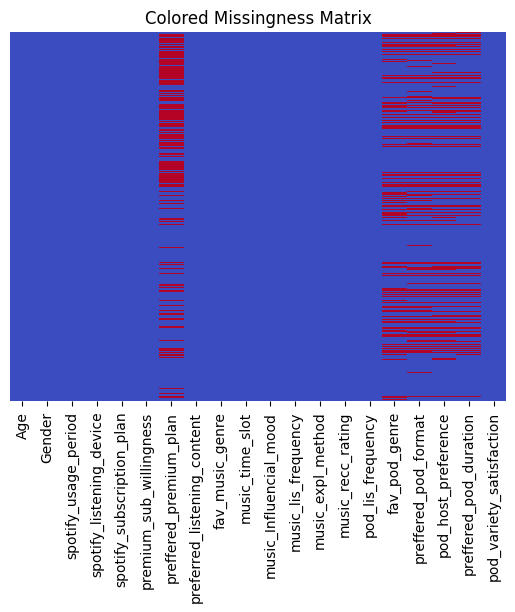

In [9]:
sns.heatmap(df.isnull(),
            cmap="coolwarm",  # any matplotlib colormap
            cbar=False,
            yticklabels=False)

plt.title("Colored Missingness Matrix")
plt.show()

In [ ]:
df =df.replace("None", np.nan)

In [11]:
# Strip spaces & standardize categories
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip().str.title().replace("Nan", np.nan)

In [12]:
print("Duplicates in the Dataset:",df.duplicated().sum())

Duplicates in the Dataset: 1


In [13]:
df= df.drop_duplicates()

In [14]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [15]:
if "pod_variety_satisfaction" in df.columns and df["pod_variety_satisfaction"].nunique() == 0:
    df = df.drop(columns=["pod_variety_satisfaction"])

# Drop duplicates if any
df = df.drop_duplicates()

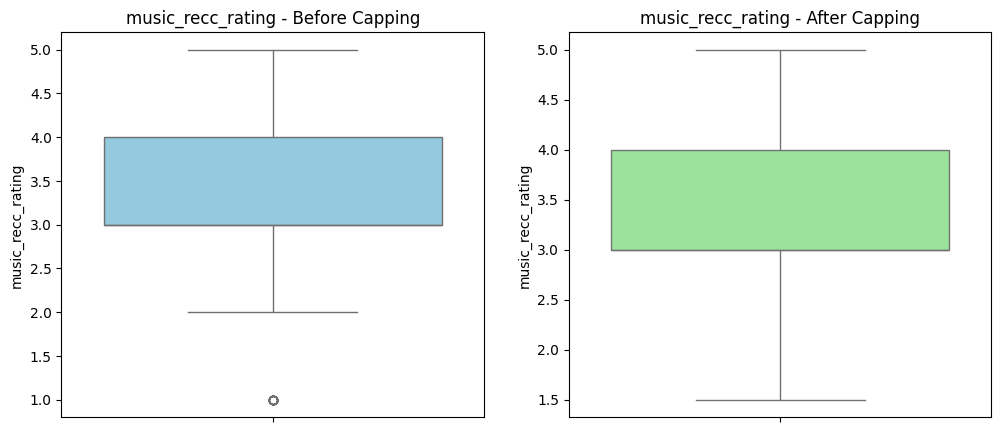

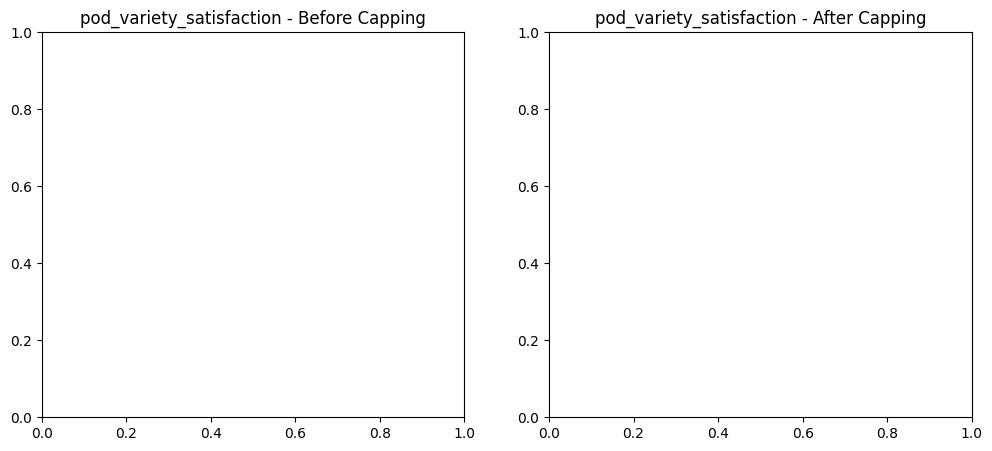

In [16]:
# Convert numeric columns properly
for col in ["music_recc_rating", "pod_variety_satisfaction"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")



# Save copy before treatment
df_before = df.copy()



# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] < lower) | (data[col] > upper)]

# Treat outliers by capping (Winsorization)
for col in ["music_recc_rating", "pod_variety_satisfaction"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))


# Visualization: Boxplots before vs after

for col in ["music_recc_rating", "pod_variety_satisfaction"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(y=df_before[col].dropna(), ax=axes[0], color="skyblue")
    axes[0].set_title(f"{col} - Before Capping")

    sns.boxplot(y=df[col].dropna(), ax=axes[1], color="lightgreen")
    axes[1].set_title(f"{col} - After Capping")

    plt.show()

In [17]:
from scipy import stats

#Null Hypothesis (H₀): Music recommendation ratings do not differ across moods.

#Alternate Hypothesis (H₁): At least one mood leads to a different rating.

mood_groups = [df[df['music_Influencial_mood'] == mood]['music_recc_rating'].dropna() for mood in df['music_Influencial_mood'].unique()]

f_stat_mood, p_val_mood = stats.f_oneway(*mood_groups)
print(f"F-statistic: {f_stat_mood:.3f}, P-value: {p_val_mood:.5f}")

F-statistic: 5.463, P-value: 0.00000


linear regression model

In [18]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Load data
df = pd.read_csv("Spotify_data.csv")

# Features (drop target column) and target
X = df.drop(columns=["music_recc_rating"])
y = df["music_recc_rating"]

# Convert categorical to numeric (dummy encoding)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Predictions:", y_pred[:10])
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Model Accuracy (via R2):", r2_score(y_test, y_pred) * 100, "%")


Model Accuracy: -1.8716830577743667e+25
Predictions: [ 2.64859401e+00  4.11886004e+00  3.60179713e+00  2.12779658e+00
 -5.61119609e+11  2.46273611e+00  4.32893421e+00  3.80443209e+00
  3.44719588e+00  3.77445281e+00]
R2 Score: -1.8716830577743667e+25
MSE: 1.6197257230739712e+25
RMSE: 4024581621826.014
MAE: 499863310673.6226
Model Accuracy (via R2): -1.8716830577743666e+27 %


ridge regression

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)


accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Predictions:", y_pred_ridge[:10])
print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print(f"Interpretation: Ridge explains {r2*100:.2f}% of variance, adding regularization to prevent overfitting.")

Model Accuracy: -1.8716830577743667e+25
Ridge Predictions: [2.64006888 4.1924206  3.58420755 2.15280342 4.5861016  3.0224872
 4.25866235 3.4498769  3.24762999 3.61726082]
R2 Score: 0.16550653858457498
MSE: 0.722157803147964
RMSE: 0.8497986838939938
MAE: 0.6840971204233425
Interpretation: Ridge explains 16.55% of variance, adding regularization to prevent overfitting.


lasso regresiion

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Predictions:", y_pred_lasso[:10])
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))

Predictions: [2.87319264 4.46514509 3.4600904  2.24809962 4.05472239 3.41497729
 4.01435152 3.06780374 3.11355613 3.13920147]
R2 Score: 0.17612896311623305
MSE: 0.7129653203801829
RMSE: 0.844372737823873
MAE: 0.6669070962164348


elastic net

In [21]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
enet.fit(X_train, y_train)

y_pred_enet = enet.predict(X_test)

print("Predictions:", y_pred_enet[:10])
print("R2 Score:", r2_score(y_test, y_pred_enet))
print("MSE:", mean_squared_error(y_test, y_pred_enet))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_enet)))
print("MAE:", mean_absolute_error(y_test, y_pred_enet))

Predictions: [2.79303025 4.49973316 3.50698225 2.22241922 4.20643839 3.37087568
 4.07804433 3.01908927 3.08665188 3.15027141]
R2 Score: 0.1796011198869374
MSE: 0.709960569328612
RMSE: 0.8425915791939841
MAE: 0.6579742707794357


classification models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Target = preffered_premium_plan
Xc = df.drop(columns=["preffered_premium_plan"])
yc = df["preffered_premium_plan"]

# Encode categorical features
Xc = pd.get_dummies(Xc, drop_first=True)

# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

knn

KNN Accuracy: 0.2980769230769231
Precision: 0.2665187376725838
Recall: 0.2980769230769231
              precision    recall  f1-score   support

           2       0.33      0.19      0.24        16
           3       0.29      0.42      0.34        36
           4       0.33      0.36      0.35        36
           5       0.00      0.00      0.00        16

    accuracy                           0.30       104
   macro avg       0.24      0.24      0.23       104
weighted avg       0.27      0.30      0.27       104



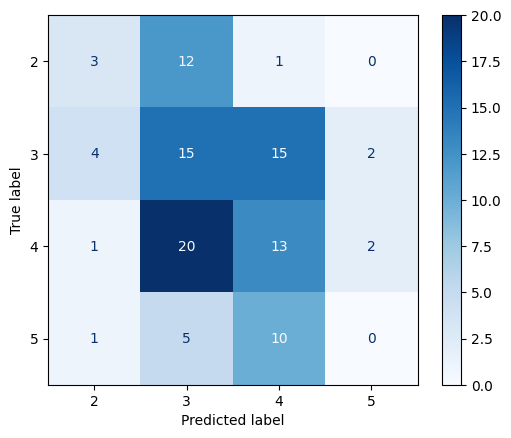

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

# Load data
df = pd.read_csv("Spotify_data.csv")
X = df.drop(columns=["music_recc_rating"])
y = df["music_recc_rating"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Scale features (KNN needs scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
